WeatherPy


Analysis

1) Temperature rises as latitude approaches 0. Conversly, temperature declines as latitude approaches -90 / 90 degrees. However, there is less data in the Southern Hemisphere. This is likely because there is less land mass in the Southern Hemisphere
2) There is no apparent correlation between cloudiness and latitude, however, most cloudiness appears to fall in even bands. It appears more common to describe the sky as 80% cloudy as opposed to 83% cloudy.
3) Most wind speeds are under 20mph, but there is a higher occurance of wind speeds above 20 mph in the far nothern cities.

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [79]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(len(cities))
cities_df = pd.DataFrame(cities)
cities_df.columns = ["Cities"]
print(len(cities_df))

618


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [80]:
# Define URL and Units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#settings = {"units": "metric", "appid": api_key}

# Create empty lists to fill with API data
cities_list = cities
city_clean = []
temp = []
lat = []
humidity = []
cloudiness = []
wind_speed = []
count = 0


# Loop through the initial city list, remove any cities where weather data is not available
for city in cities_list:
    try:
        response = requests.get(query_url + city).json()
        city_clean.append(response["name"])
        print(f"'{query_url + city}', Printing Record: {len(city_clean)} of 550 | {city}")

    except KeyError:
        continue
    
              




'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=kodiak', Printing Record: 1 of 1 | kodiak
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=biak', Printing Record: 1 of 2 | biak
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=bathsheba', Printing Record: 1 of 3 | bathsheba
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=narsaq', Printing Record: 1 of 4 | narsaq
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=hadsund', Printing Record: 1 of 5 | hadsund
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=puerto ayora', Printing Record: 1 of 6 | puerto ayora
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=barr

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=wum', Printing Record: 1 of 56 | wum
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=cabo san lucas', Printing Record: 1 of 57 | cabo san lucas
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=nara', Printing Record: 1 of 58 | nara
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=chokurdakh', Printing Record: 1 of 59 | chokurdakh
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=kapaa', Printing Record: 1 of 60 | kapaa
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=caconda', Printing Record: 1 of 61 | caconda
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=mount gambier', Printing Record: 1 of 111 | mount gambier
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=ancud', Printing Record: 1 of 112 | ancud
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=williams lake', Printing Record: 1 of 113 | williams lake
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=leningradskiy', Printing Record: 1 of 114 | leningradskiy
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=esperance', Printing Record: 1 of 115 | esperance
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=pangnirtung', Printing Record: 1 of 116 | pangnirtung
'http://api.openweathermap.org/data/2.5/weather?appid=11

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=airai', Printing Record: 1 of 165 | airai
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=cherskiy', Printing Record: 1 of 166 | cherskiy
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=coquimbo', Printing Record: 1 of 167 | coquimbo
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=mayo', Printing Record: 1 of 168 | mayo
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=kovur', Printing Record: 1 of 169 | kovur
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=daro', Printing Record: 1 of 170 | daro
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=beipiao', Pr

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=tiznit', Printing Record: 1 of 220 | tiznit
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=crucea', Printing Record: 1 of 221 | crucea
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=fjerritslev', Printing Record: 1 of 222 | fjerritslev
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=bintulu', Printing Record: 1 of 223 | bintulu
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=jumla', Printing Record: 1 of 224 | jumla
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=vanavara', Printing Record: 1 of 225 | vanavara
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imper

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=thompson', Printing Record: 1 of 274 | thompson
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=inskoy', Printing Record: 1 of 275 | inskoy
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=masterton', Printing Record: 1 of 276 | masterton
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=takoradi', Printing Record: 1 of 277 | takoradi
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=bandarbeyla', Printing Record: 1 of 278 | bandarbeyla
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=kaeo', Printing Record: 1 of 279 | kaeo
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=okhotsk', Printing Record: 1 of 329 | okhotsk
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=porto novo', Printing Record: 1 of 330 | porto novo
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=meulaboh', Printing Record: 1 of 331 | meulaboh
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=tupik', Printing Record: 1 of 332 | tupik
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=shelburne', Printing Record: 1 of 333 | shelburne
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=guatire', Printing Record: 1 of 334 | guatire
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=ambilobe', Printing Record: 1 of 383 | ambilobe
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=bilibino', Printing Record: 1 of 384 | bilibino
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=kargat', Printing Record: 1 of 385 | kargat
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=banjar', Printing Record: 1 of 386 | banjar
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=fiumicino', Printing Record: 1 of 387 | fiumicino
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=ati', Printing Record: 1 of 388 | ati
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=pevek', Printing Record: 1 of 438 | pevek
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=luderitz', Printing Record: 1 of 439 | luderitz
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=hirado', Printing Record: 1 of 440 | hirado
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=evanston', Printing Record: 1 of 441 | evanston
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=muncar', Printing Record: 1 of 442 | muncar
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=caluquembe', Printing Record: 1 of 443 | caluquembe
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imper

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=barranca', Printing Record: 1 of 493 | barranca
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=port macquarie', Printing Record: 1 of 494 | port macquarie
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=itupiranga', Printing Record: 1 of 495 | itupiranga
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=simao', Printing Record: 1 of 496 | simao
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=kruisfontein', Printing Record: 1 of 497 | kruisfontein
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=nalut', Printing Record: 1 of 498 | nalut
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877

'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=gold coast', Printing Record: 1 of 548 | gold coast
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=oxelosund', Printing Record: 1 of 549 | oxelosund
'http://api.openweathermap.org/data/2.5/weather?appid=11a7cf4c210281a26b8877f975a46436&units=imperial&q=madaoua', Printing Record: 1 of 550 | madaoua


In [81]:
# Create For loops to scrape data for analysis

for city in city_clean:
    response = requests.get(query_url + city).json()
    temp.append(response["main"]["temp_max"])

for city in city_clean:
    response = requests.get(query_url + city).json()
    lat.append(response["coord"]["lat"])

for city in city_clean:
    response = requests.get(query_url + city).json()
    humidity.append(response["main"]["humidity"])

for city in city_clean:
    response = requests.get(query_url + city).json()
    cloudiness.append(response["clouds"]["all"])
    
for city in city_clean:
    response = requests.get(query_url + city).json()
    wind_speed.append(response["wind"]["speed"])
    


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [87]:
#Create the dictionary to store the values from API request and convert it to a DataFrame
weather_dict = {"lat": lat, "temp": temp,
                "humidity": humidity,"cloudiness": cloudiness,
                "wind_speed": wind_speed }
weather_data = pd.DataFrame(weather_dict, index=city_clean)

weather_data = weather_data.rename(columns={"lat": "Lat",
                                           "temp": "Temperature (F)",
                                           "humidity":"Humidity (%)",
                                           "cloudiness": "Cloudiness (%)",
                                           "wind_speed": "Wind Speed"})
weather_data.index.name = "City"

weather_data.head()

,Lat,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed
City,,,,,
Kodiak,39.95,45.00,78,90,6.93
Biak,-0.91,83.73,84,76,2.37
Bathsheba,13.22,77.00,78,40,18.34
Narsaq,60.91,19.40,73,68,3.36
Hadsund,56.72,41.00,86,0,16.11


In [83]:
export_cities = weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

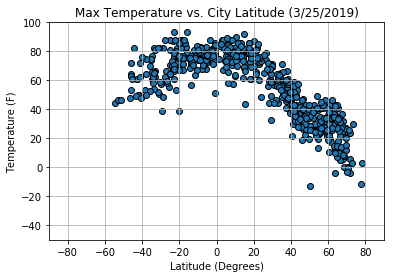

In [85]:
temp_scatter = plt.scatter(weather_data["Lat"], weather_data["Temperature (F)"], edgecolors="black")
plt.title("Max Temperature vs. City Latitude (3/25/2019)")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (F)")
plt.ylim(-50, 100)
plt.xlim(-90, 90)
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

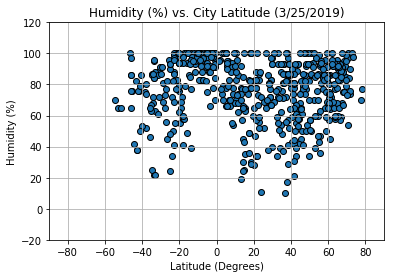

In [88]:
temp_scatter = plt.scatter(weather_data["Lat"], weather_data["Humidity (%)"], edgecolors="black")
plt.title("Humidity (%) vs. City Latitude (3/25/2019)")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.ylim(-20, 120)
plt.xlim(-90, 90)
plt.grid()
plt.savefig("Images/humidityvslatitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

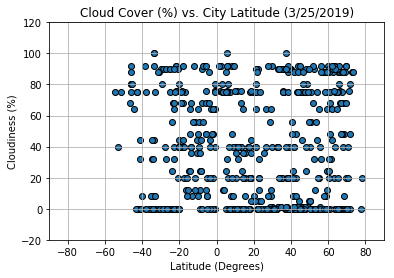

In [90]:
temp_scatter = plt.scatter(weather_data["Lat"], weather_data["Cloudiness (%)"], edgecolors="black")
plt.title("Cloud Cover (%) vs. City Latitude (3/25/2019)")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.xlim(-90, 90)
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

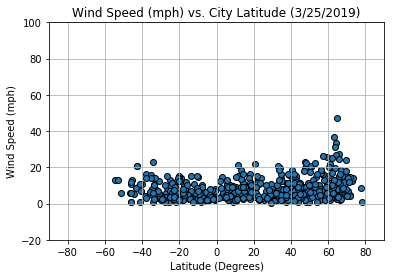

In [93]:
temp_scatter = plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolors="black")
plt.title("Wind Speed (mph) vs. City Latitude (3/25/2019)")
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-20, 100)
plt.xlim(-90, 90)
plt.grid()
plt.show()